## Print working directory

In [1]:
pwd

'/Users/davneetkaur/Desktop/Personal_Git_Projects/Classifier_predict_population_from_genotype'

## Import Libraries used in notebook

In [1]:
import pandas as pd # For working with dataframes
import numpy as np
from sklearn import decomposition # For performing PCA on the data
import matplotlib.pyplot as plt # For plotting visualizations of analysis
from sklearn.manifold import TSNE # For performing TSNE
import altair as alt # For additional plotting functionality
import warnings # Suppress warnings from output

# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Import and look at the snps data for the samples

In [2]:
chrom22_df = pd.read_csv('matrix_10step.csv')
chrom22_df

,Unnamed: 0,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,...,rs186168008,rs76759269,rs182890688,rs148355237,rs189454695,rs145777112,rs191731586,rs141330630,rs201907533,Population code
0,HG00096,0,1,0,0,1,0,0,0,0,...,1,2,0,0,1,0,0,0,0,GBR
1,HG00097,1,1,1,0,0,1,1,1,0,...,1,2,0,0,0,0,0,0,0,GBR
2,HG00099,1,0,1,0,0,1,0,1,0,...,0,2,0,0,0,0,0,0,0,GBR
3,HG00100,0,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,GBR
4,HG00101,1,0,0,0,1,1,1,1,0,...,1,2,0,0,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,0,0,1,0,0,0,0,...,0,2,0,0,1,0,0,0,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,TSI


In [3]:
chrom15_df = pd.read_csv('matrix_chr15_10step.csv')
chrom15_df

,Unnamed: 0,rs145629091,rs4978229,rs141582630,rs11535026,rs192961005,rs139142289,rs184546611,rs147994986,rs139872915,...,rs144613354,rs145297176,rs187931964,rs184861377,rs12101872,rs146616397,rs183169977,rs62028692,rs180903456,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,GBR
1,HG00097,1,0,0,0,0,1,0,0,0,...,0,1,1,2,0,1,1,0,0,GBR
2,HG00099,0,1,0,0,0,0,0,0,0,...,0,0,0,2,0,1,1,0,0,GBR
3,HG00100,0,0,0,0,0,0,0,0,0,...,0,2,2,2,0,0,0,0,0,GBR
4,HG00101,1,0,0,0,0,1,0,0,0,...,0,1,1,2,0,1,2,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,1,1,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,...,0,1,1,2,0,0,0,0,0,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,TSI


In [4]:
chrom8_df = pd.read_csv('matrix_chr8_10step.csv')
chrom8_df

,Unnamed: 0,rs200386536,rs200578029,rs187651771,rs184718326,rs190208619,rs200132521,rs147310952,rs189011669,Unnamed: 9,...,rs139230210,rs7814644,rs187973589,rs185321699,rs183822496,rs183544688,rs181477208,rs181073958,rs183660025,Population code
0,HG00096,0,0,0,0,0,1,0,0,2,...,0,2,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,0,0,0,GBR
3,HG00100,0,0,0,0,0,0,0,0,2,...,0,2,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,0,0,0,0,0,0,1,...,0,2,0,0,0,0,0,0,1,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,1,0,0,1,0,0,0,2,...,0,1,0,0,0,0,0,0,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,2,...,0,2,0,0,0,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,1,0,0,2,...,0,1,0,0,0,0,0,0,0,TSI
1090,NA20826,0,0,0,0,1,0,0,0,2,...,0,2,0,0,0,0,0,0,0,TSI


In [5]:
step_df = pd.merge(chrom22_df,chrom15_df, how='inner', on =['Unnamed: 0','Population code'])
df = pd.merge(step_df,chrom8_df, how='inner', on =['Unnamed: 0','Population code'])

## Provide the appropriate label for the unnamed column --> Samples. The rest of the columns refer to the snps

In [6]:
df.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True) #The columns correspond to the specific snp that is present (1) or absent (0)
df

,Sample,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,...,rs13265037,rs139230210,rs7814644,rs187973589,rs185321699,rs183822496,rs183544688,rs181477208,rs181073958,rs183660025
0,HG00096,0,1,0,0,1,0,0,0,0,...,2,0,2,0,0,0,0,0,0,0
1,HG00097,1,1,1,0,0,1,1,1,0,...,1,0,1,0,0,0,0,0,0,0
2,HG00099,1,0,1,0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,0
3,HG00100,0,0,0,0,1,0,0,0,0,...,2,0,2,0,0,0,0,0,0,0
4,HG00101,1,0,0,0,1,1,1,1,0,...,2,0,2,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1088,NA20818,0,0,0,0,0,0,0,0,0,...,2,0,2,0,0,0,0,0,0,0
1089,NA20819,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1090,NA20826,0,0,0,0,0,0,0,0,0,...,2,0,2,0,0,0,0,0,0,0


## Prepare the data for fitting --> the categorical and numerical data must be separated

In [7]:
non_snp_columns = ['Population code', 'Sample'] #,

In [8]:
df_snps = df.drop(non_snp_columns, axis=1)
matrix = df_snps.to_numpy()
print(matrix.shape)
matrix

(1092, 380870)


array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Create a PCA model for training and fit it to the data

In [9]:
pca = decomposition.PCA(n_components=2) # Model creation with 2 principal components
pca.fit(matrix) # Fit the model to the snps data

PCA(n_components=2)

## The fit parameters to quality of fit

In [10]:
# This attribute provides the percentage of the dataset's variance that is captured by each principal component.
# It helps to determine how much information (variance) each component holds relative to the total variance of the original dataset.
print(f' Explained Variance Ratio: {pca.explained_variance_ratio_}') # The higher the stronger

## This attribute contains the singular values of the data matrix after applying PCA. Singular values are derived from the
## Singular Value Decomposition (SVD) and are related to the importance of each principal component.
print(f' Singular Values: {pca.singular_values_}') # The higher the stronger

 Explained Variance Ratio: [0.08649576 0.05440967]
 Singular Values: [1630.75590448 1293.39031682]


## Transform the matrix into the principal component basis --> Expect each sample to have 2 values, i.e. shape = (#samples, 2)

In [11]:
to_plot = pca.transform(matrix)
to_plot.shape

(1092, 2)

## Plot the data in the principal component space --> Looks like roughly 3 clusters

Text(0, 0.5, 'PC1')

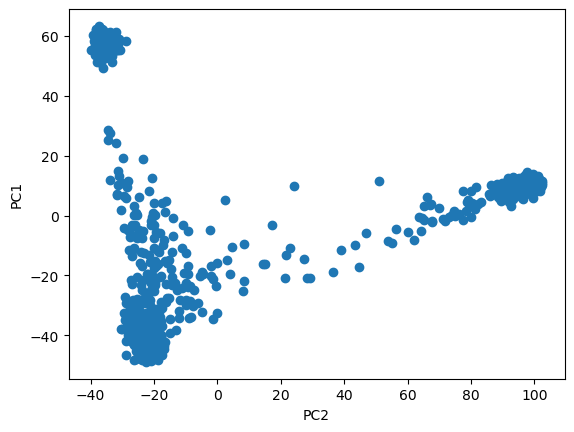

In [12]:
plt.scatter(x=to_plot[:, 0], y=to_plot[:, 1])
plt.xlabel('PC2')
plt.ylabel('PC1')

## Now lets add the categorical data back to see if the clustering correlates with any features

In [13]:
df_plot = df[non_snp_columns].copy()
df_plot

,Population code,Sample
0,GBR,HG00096
1,GBR,HG00097
2,GBR,HG00099
3,GBR,HG00100
4,GBR,HG00101
...,...,...
1087,TSI,NA20816
1088,TSI,NA20818
1089,TSI,NA20819
1090,TSI,NA20826


In [14]:
df_plot['PC1'] = to_plot[:, 0]
df_plot['PC2'] = to_plot[:, 1]
df_plot

,Population code,Sample,PC1,PC2
0,GBR,HG00096,-22.339230,-42.307519
1,GBR,HG00097,-23.477532,-45.190297
2,GBR,HG00099,-20.505383,-45.465270
3,GBR,HG00100,-23.253699,-45.038373
4,GBR,HG00101,-21.203161,-40.363563
...,...,...,...,...
1087,TSI,NA20816,-18.877911,-48.090524
1088,TSI,NA20818,-23.530764,-42.859857
1089,TSI,NA20819,-23.719552,-40.520497
1090,TSI,NA20826,-23.718883,-40.835045


### The unique populations:

## It's unclear if there's any clustering of populations here, so let's import more demographical data
## Sample data from the thousand genomes project:

In [15]:
pop_df = pd.read_csv('igsr_populations.tsv', sep='\t')
print(f'Size of df: {pop_df.shape}')
pop_df.head()

Size of df: (212, 11)


,Population code,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,CHS,CHS,Southern Han Chinese,Han Chinese South,23.13333,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,KHV,KHV,Kinh Vietnamese,"Kinh in Ho Chi Minh City, Vietnam",10.78000,106.680000,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,NaN,BrahminSGDP,Brahmin,Brahmin in India (SGDP),17.70000,83.300000,NaN,South Asia (SGDP),#008c1e,18,Simons Genome Diversity Project
3,NaN,MiaoSGDP,Miao,Miao in China (SGDP),28.00000,109.000000,NaN,East Asia (SGDP),#ff48de,16,Simons Genome Diversity Project
4,NaN,KyrgyzSGDP,Kyrgyz,Kyrgyz in Kyrgyzystan (SGDP),42.90000,74.600000,NaN,Central Asia and Siberia (SGDP),#01daa0,15,Simons Genome Diversity Project


In [16]:
df_plot = df_plot.merge(pop_df, on='Population code', how='inner') # Merge the demographical data  to the df with principal component values
print(f'Size of df: {df_plot.shape}')
df_plot.head()

Size of df: (1092, 14)


,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,GBR,HG00096,-22.339230,-42.307519,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,GBR,HG00097,-23.477532,-45.190297,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,GBR,HG00099,-20.505383,-45.465270,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,GBR,HG00100,-23.253699,-45.038373,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,GBR,HG00101,-21.203161,-40.363563,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [17]:
df_plot['Population name'].unique() # A lot more populations than there are clusters

array(['British', 'Finnish', 'Southern Han Chinese', 'Puerto Rican',
       'Colombian', 'Iberian', 'CEPH', 'Yoruba', 'Han Chinese',
       'Japanese', 'Luhya', 'African Ancestry SW', 'Mexican Ancestry',
       'Toscani'], dtype=object)

In [18]:
chart = alt.Chart(df_plot).mark_point().encode(
    x=alt.X('PC1', title='Principal Component 1', axis=alt.Axis(titleFontSize=20, labelFontSize=14)),
    y=alt.Y('PC2', title='Principal Component 2', axis=alt.Axis(titleFontSize=20, labelFontSize=14)),
    color=alt.Color('Population name', scale=alt.Scale(scheme='category20'),
                    legend=alt.Legend(title='Population',
                                      titleFontSize=22,  # Font size for the legend title
                                      labelFontSize=14))  # Font size for the legend labels
).properties(
    title=alt.TitleParams(text='Population PCA', fontSize=20),
    width=800,  # Set width as per your requirements
    height=400  # Set height as per your requirements
)
chart.save('Population_3ch_PCA.png', format='png')  # Save as PNG

# Display the chart
chart

alt.Chart(...)

## Plot PCA with superpopulation category as the color outline and population code as the fill color

In [19]:
chart = alt.Chart(df_plot).mark_point().encode(
    x=alt.X('PC1', title='Principal Component 1', axis=alt.Axis(titleFontSize=20, labelFontSize=14)),
    y=alt.Y('PC2', title='Principal Component 2', axis=alt.Axis(titleFontSize=20, labelFontSize=14)),
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20'),
                    legend=alt.Legend(title='Population',
                                      titleFontSize=22,  # Font size for the legend title
                                      labelFontSize=14))  # Font size for the legend labels
).properties(
    title=alt.TitleParams(text='Superpopulation PCA', fontSize=20),
    width=800,  # Set width as per your requirements
    height=400  # Set height as per your requirements
)
chart.save('Superpopulation_3ch_PCA.png', format='png')  # Save as PNG

# Display the chart
chart

alt.Chart(...)

In [20]:
chart = alt.Chart(df_plot).mark_point().encode(
    x=alt.X('PC1', title='Principal Component 1', axis=alt.Axis(titleFontSize=20, labelFontSize=14)),
    y=alt.Y('PC2', title='Principal Component 2', axis=alt.Axis(titleFontSize=20, labelFontSize=14)),
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20'),
                    legend=alt.Legend(title='Population',
                                      titleFontSize=22,  # Font size for the legend title
                                      labelFontSize=14)),  # Font size for the legend labels
    fill='Population name'
).properties(
    title=alt.TitleParams(text='Superpopulation PCA', fontSize=20),
    width=800,  # Set width as per your requirements
    height=400  # Set height as per your requirements
)
chart.save('Superpopulation_3ch_PCA_pop_fill.png', format='png')  # Save as PNG

# Display the chart
chart

alt.Chart(...)

# __Observations:__
## --> Looks like the data clusters pretty well by 3 major superpopulations: African, East Asian, and European!
## --> Americans primarily cluster around the European Ancestry cluster with some bleedthrough to other population clusters, which is expected as Europeans descendants are the biggest American group. 

In [ ]:
X = matrix
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(X)
X_embedded.shape

In [ ]:
df_plot['tsne1'] = X_embedded[:,0]
df_plot['tsne2'] = X_embedded[:,1]

In [ ]:
df_plot.head()

## Let's try tSNE instead to try to catch for any non-linear effects:
### By Superpopulation

In [ ]:
alt.Chart(df_plot).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20'))
)

### By Population

In [ ]:
alt.Chart(df_plot).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Population name', scale=alt.Scale(scheme='category20'))
)

## I want to take a deeper look into the American Superpopulation

In [37]:
american_df = df_plot[df_plot['Superpopulation name'] == 'American Ancestry']
euro_amer_df = df_plot[(df_plot['Superpopulation name'] == 'American Ancestry') | (df_plot['Superpopulation name'] == 'European Ancestry')]

In [38]:
# Create the first chart for euro_amer_df
chart1 = alt.Chart(euro_amer_df).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20'))
)

# Create the second chart for american_df
chart2 = alt.Chart(american_df).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Population name', scale=alt.Scale(scheme='category20'))
)

# Combine the charts
combined_chart = alt.layer(chart1, chart2)

# Display the combined chart
combined_chart

alt.LayerChart(...)

In [39]:
print(american_df['Population name'].unique())
print(euro_amer_df['Superpopulation name'].unique())

['Puerto Rican' 'Colombian' 'Mexican Ancestry']
['European Ancestry' 'American Ancestry']


In [94]:
# Define subdued color scale for chart 1
subdued_color_scale = alt.Scale(domain=['European Ancestry', 'American Ancestry'],
                                 range=['#d9d9d9', '#b0b0b0'])  # Example subdued colors
# Create the first chart for euro_amer_df
chart1 = alt.Chart(euro_amer_df).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Superpopulation name', scale=subdued_color_scale)
)

# Define vibrant color scale for chart 2
vibrant_color_scale = alt.Scale(domain=['Puerto Rican', 'Colombian', 'Mexican Ancestry'],
                                 range=['blue','yellow','red'])  # Example vibrant colors

# Create the second chart for american_df with vibrant colors
chart2 = alt.Chart(american_df).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Population name', scale=vibrant_color_scale)
)
# Combine the charts
combined_chart = alt.layer(chart1, chart2)

# Display the combined chart
combined_chart

alt.LayerChart(...)

In [75]:
# Get the loadings (contribution of each feature to the principal components)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for better visualization
loading_df = pd.DataFrame(loadings, index=df_snps.columns, columns=[f'PC{i + 1}' for i in range(len(loadings[0]))])

loading_df['PC1_mag'] = np.sqrt(loading_df['PC1']**2)
loading_df['PC2_mag'] = np.sqrt(loading_df['PC2']**2)
# Sort by the absolute values of loadings for PC1
sorted_loading_df = loading_df.sort_values(by='PC1_mag', ascending=False)
major_snps = sorted_loading_df[(sorted_loading_df['PC1_mag'] > 0.1) | (sorted_loading_df['PC2_mag'] > 0.1)]
major_snps.shape

(828, 4)

array([[<Axes: title={'center': 'PC1'}>, <Axes: title={'center': 'PC2'}>],
       [<Axes: title={'center': 'PC1_mag'}>,
        <Axes: title={'center': 'PC2_mag'}>]], dtype=object)

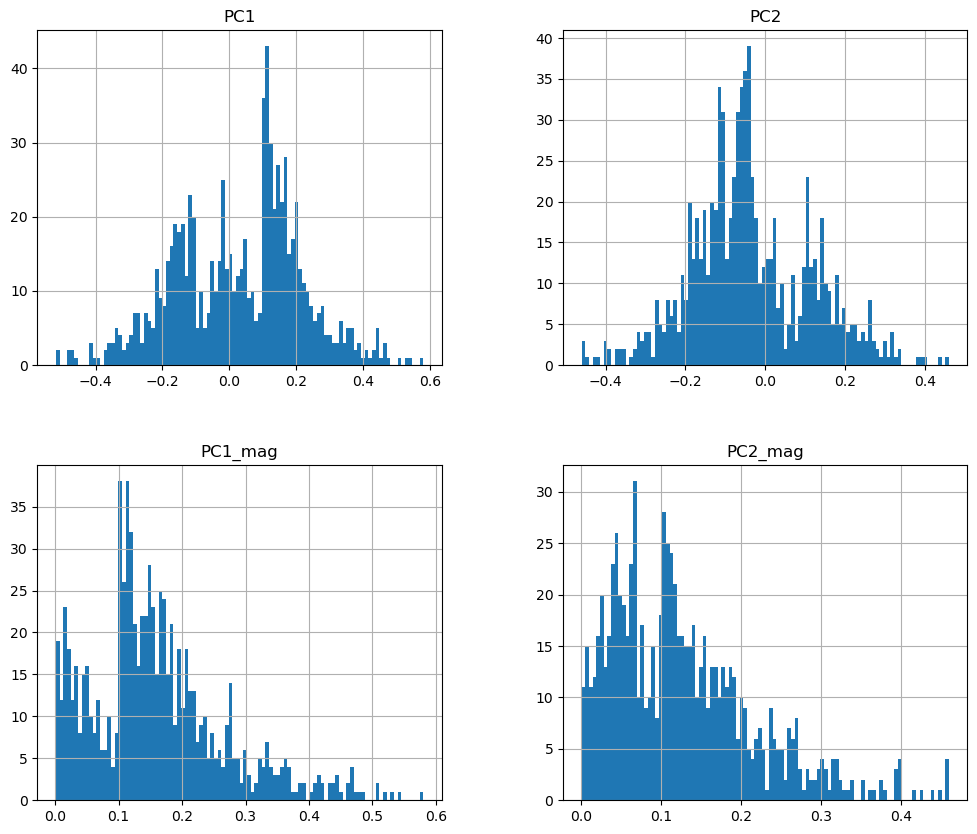

In [73]:
major_snps.hist(bins = 100, figsize = (12,10))

In [78]:
# Get the loadings (contribution of each feature to the principal components)
components = pca.components_.T

# Create a DataFrame for better visualization
components_df = pd.DataFrame(components, index=df_snps.columns, columns=[f'PC{i + 1}' for i in range(len(loadings[0]))])

components_df['PC1_mag'] = np.sqrt(components_df['PC1']**2)
components_df['PC2_mag'] = np.sqrt(components_df['PC2']**2)
# Sort by the absolute values of loadings for PC1
sorted_components_df = components_df.sort_values(by='PC1_mag', ascending=False)
major_snps_components_df = sorted_components_df[(sorted_components_df['PC1_mag'] > 0.01) | (sorted_components_df['PC2_mag'] > 0.01)]
major_snps_components_df.shape

(1205, 4)

In [77]:
sorted_components_df

,PC1,PC2,PC1_mag,PC2_mag
rs5996422,0.101477,0.035590,0.101477,0.035590
rs4820065,0.094409,0.001410,0.094409,0.001410
rs6002556,0.092854,0.006780,0.092854,0.006780
rs5757633,-0.090664,-0.011949,0.090664,0.011949
rs2078727,0.089288,0.011554,0.089288,0.011554
...,...,...,...,...
rs190117328,0.000000,0.000000,0.000000,0.000000
rs190653118,0.000000,0.000000,0.000000,0.000000
rs2032113,0.000000,0.000000,0.000000,0.000000
rs199590603,0.000000,0.000000,0.000000,0.000000
